In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [43]:
n_jct = 80
lj = 1.42
cj = 5.388e-5
cg = 1.44e-7
ct = 2e-5

rg = np.inf
rjp = 1e6
rjs = 0
rt = np.inf

In [44]:
zs = lambda _w, _lj, _cj, _rjp, _rjs: 1/(1/(1j*_lj*_w) + 1j*_cj*_w + 1/_rjp) + _rjs
yg = lambda _w, _cg, _rg: 1j*_cg*_w + 1/_rg
yt = lambda _w, _ct, _rt: 1j*_ct*_w + 1/_rt

#Continuous
gamma = lambda _w, _lj, _cj, _cg, _rjs, _rjp, _rg: -1j*np.sqrt(zs(_w, _lj, _cj, _rjp, _rjs)*yg(_w, _cg, _rg))
zl = lambda _w, _lj, _cj, _cg, _rjs, _rjp, _rg: np.sqrt(zs(_w, _lj, _cj, _rjp, _rjs)/yg(_w, _cg, _rg))

# Discrete
# gamma = lambda w, lj, cj, cg: np.arccos(zs(w, lj, cj)*yg(w, cg)/2+1)
# zl = lambda w, lj, cj, cg: np.sqrt(zs(w, lj, cj)/yg(w, cg)*np.exp(1j*gamma(w, lj, cj, cg)))

C:\Users\rroussea\AppData\Local\Temp\ipykernel_4072\145794359.py:1: RuntimeWarning: divide by zero encountered in true_divide
  zs = lambda _w, _lj, _cj, _rjp, _rjs: 1/(1/(1j*_lj*_w) + 1j*_cj*_w + 1/_rjp) + _rjs
C:\Users\rroussea\AppData\Local\Temp\ipykernel_4072\145794359.py:1: RuntimeWarning: invalid value encountered in true_divide
  zs = lambda _w, _lj, _cj, _rjp, _rjs: 1/(1/(1j*_lj*_w) + 1j*_cj*_w + 1/_rjp) + _rjs
C:\Users\rroussea\AppData\Local\Temp\ipykernel_4072\1442807031.py:8: RuntimeWarning: invalid value encountered in true_divide
  i_in = 2*yt_v*np.cosh(1j*gam*n_jct)+(zl_v*yt_v**2+1/zl_v)*np.sinh(1j*gam*n_jct)
C:\Users\rroussea\AppData\Local\Temp\ipykernel_4072\1442807031.py:9: RuntimeWarning: invalid value encountered in true_divide
  y_in = i_in/v_in
C:\Users\rroussea\AppData\Local\Temp\ipykernel_4072\1442807031.py:20: RuntimeWarning: invalid value encountered in log
  re_y_in = np.log(y_in)
C:\Users\rroussea\AppData\Local\Temp\ipykernel_4072\1442807031.py:21: RuntimeWar

1.8591832808732652e-25 15.335685773438968


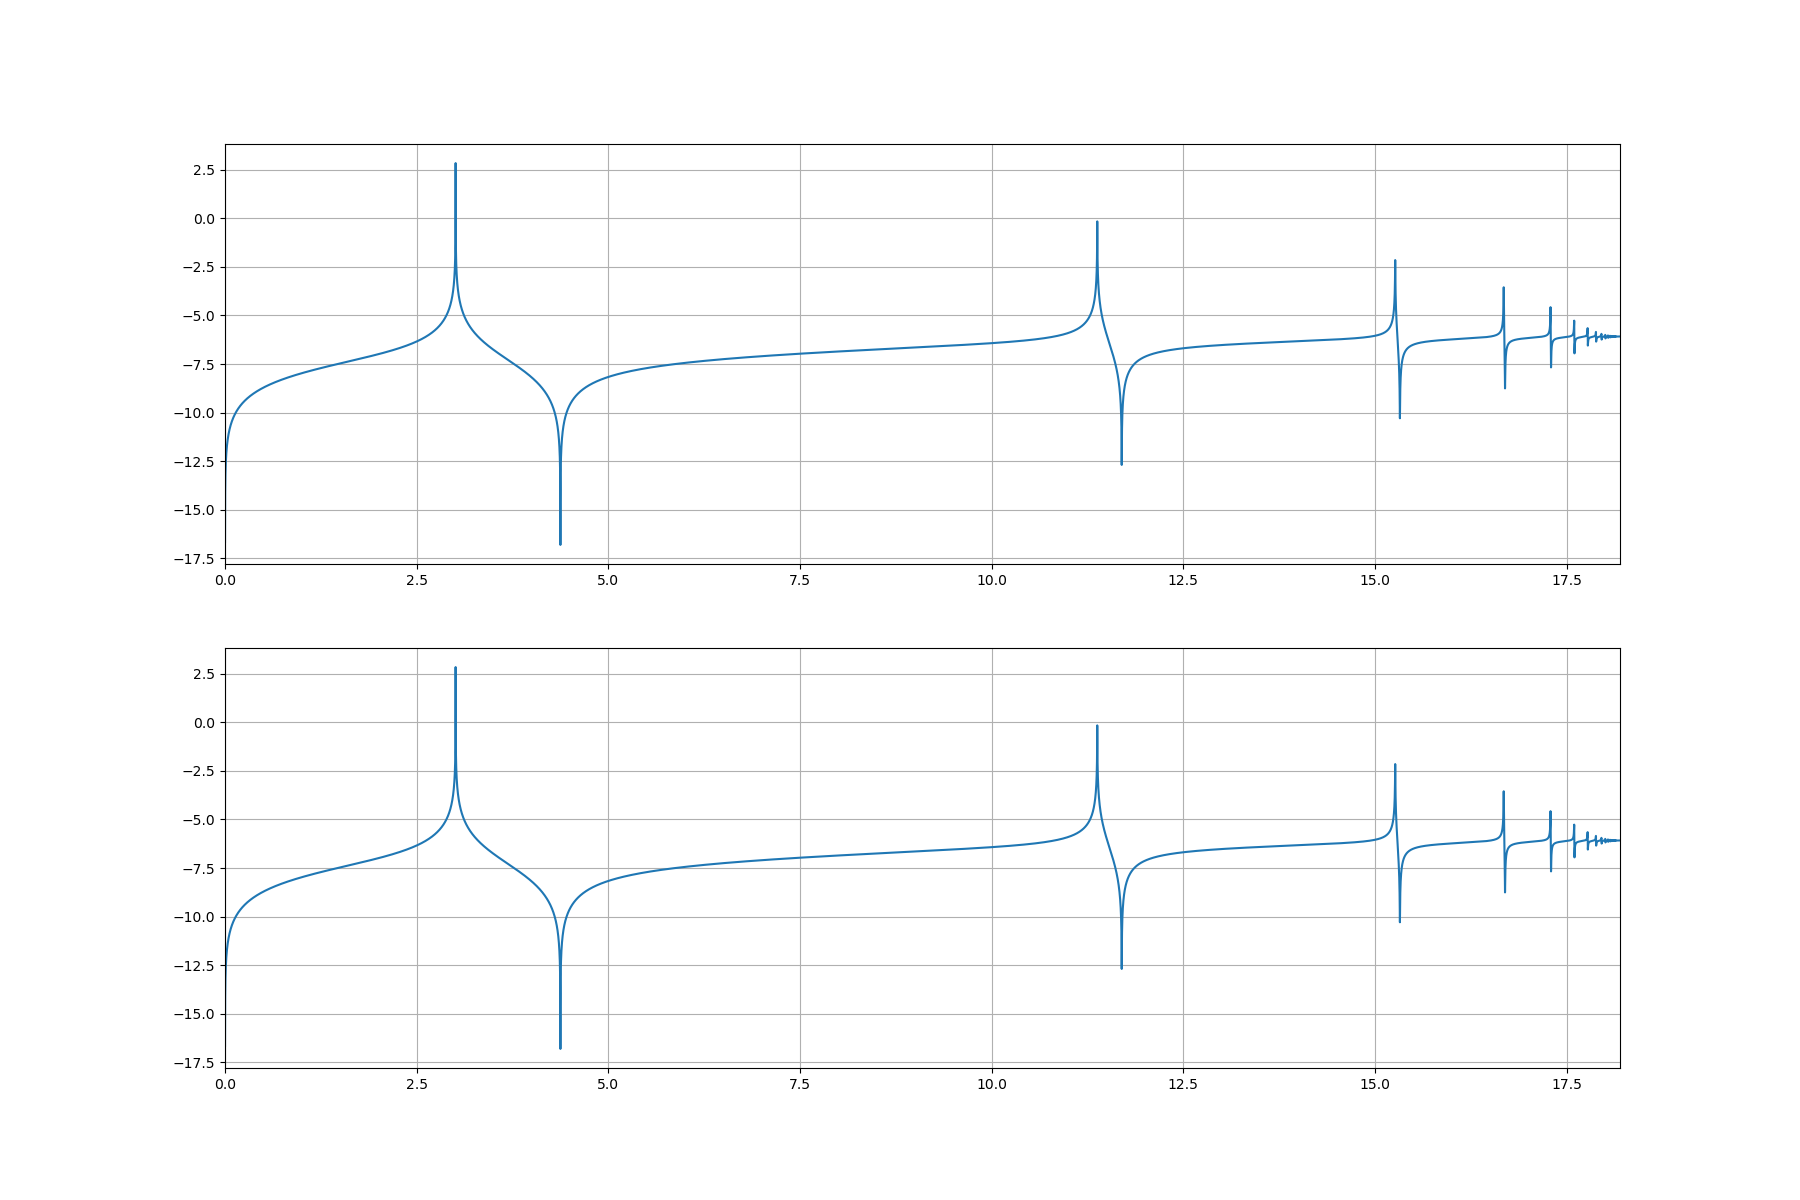

In [45]:
fmin, fmax = 0, 1/np.sqrt(lj*cj)/2/np.pi
#fmin, fmax = 14.75 ,15
ws = np.linspace(fmin, fmax, 100000)*2*np.pi
gam = gamma(ws, lj, cj, cg, rjs, rjp, rg)
zl_v = zl(ws, lj, cj, cg, rjs, rjp, rg)
yt_v = yt(ws,ct, rt)
v_in = np.cosh(1j*gam*n_jct)+zl_v*yt_v*np.sinh(1j*gam*n_jct)
i_in = 2*yt_v*np.cosh(1j*gam*n_jct)+(zl_v*yt_v**2+1/zl_v)*np.sinh(1j*gam*n_jct)
y_in = i_in/v_in

print(np.nanmin(np.real(y_in)), np.nanmax(np.real(y_in)))
fig,axs = plt.subplots(2,1,figsize=(18,12))

re_y_in = np.real(y_in)
im_y_in = np.imag(y_in)

re_y_in = np.abs(y_in)
im_y_in = np.abs(y_in)

re_y_in = np.log(y_in)
im_y_in = np.log(y_in)

axs[0].plot(ws/2/np.pi,re_y_in)
axs[1].plot(ws/2/np.pi,im_y_in)

ylim_comp = 0.1

axs[0].grid()
axs[1].grid()
axs[0].set_xlim([fmin, fmax])
axs[1].set_xlim([fmin, fmax])
# axs[0].set_ylim([-10,10])
# axs[1].set_ylim([-ylim_comp,ylim_comp])
fig.tight_layout()
plt.show()

In [46]:
fmin, fmax = 0, 1/np.sqrt(lj*cj)/2/np.pi
zmin, zmax = 0,1
w_r = np.linspace(fmin, fmax, 1000)*2*np.pi
w_i = np.linspace(zmin, zmax, 500)*2*np.pi

re,im = np.meshgrid(w_r,w_i)
ws = re+1j*im

gam = gamma(ws, lj, cj, cg, rjs, rjp, rg)
zl_v = zl(ws, lj, cj, cg, rjs, rjp, rg)
yt_v = yt(ws,ct, rt)
v_in = np.cosh(1j*gam*n_jct)+zl_v*yt_v*np.sinh(1j*gam*n_jct)
i_in = 2*yt_v*np.cosh(1j*gam*n_jct)+(zl_v*yt_v**2+1/zl_v)*np.sinh(1j*gam*n_jct)
y_in = i_in/v_in

C:\Users\rroussea\AppData\Local\Temp\ipykernel_4072\145794359.py:1: RuntimeWarning: divide by zero encountered in true_divide
  zs = lambda _w, _lj, _cj, _rjp, _rjs: 1/(1/(1j*_lj*_w) + 1j*_cj*_w + 1/_rjp) + _rjs
C:\Users\rroussea\AppData\Local\Temp\ipykernel_4072\145794359.py:1: RuntimeWarning: invalid value encountered in true_divide
  zs = lambda _w, _lj, _cj, _rjp, _rjs: 1/(1/(1j*_lj*_w) + 1j*_cj*_w + 1/_rjp) + _rjs
C:\Users\rroussea\AppData\Local\Temp\ipykernel_4072\2079778943.py:13: RuntimeWarning: invalid value encountered in true_divide
  i_in = 2*yt_v*np.cosh(1j*gam*n_jct)+(zl_v*yt_v**2+1/zl_v)*np.sinh(1j*gam*n_jct)
C:\Users\rroussea\AppData\Local\Temp\ipykernel_4072\2079778943.py:14: RuntimeWarning: invalid value encountered in true_divide
  y_in = i_in/v_in


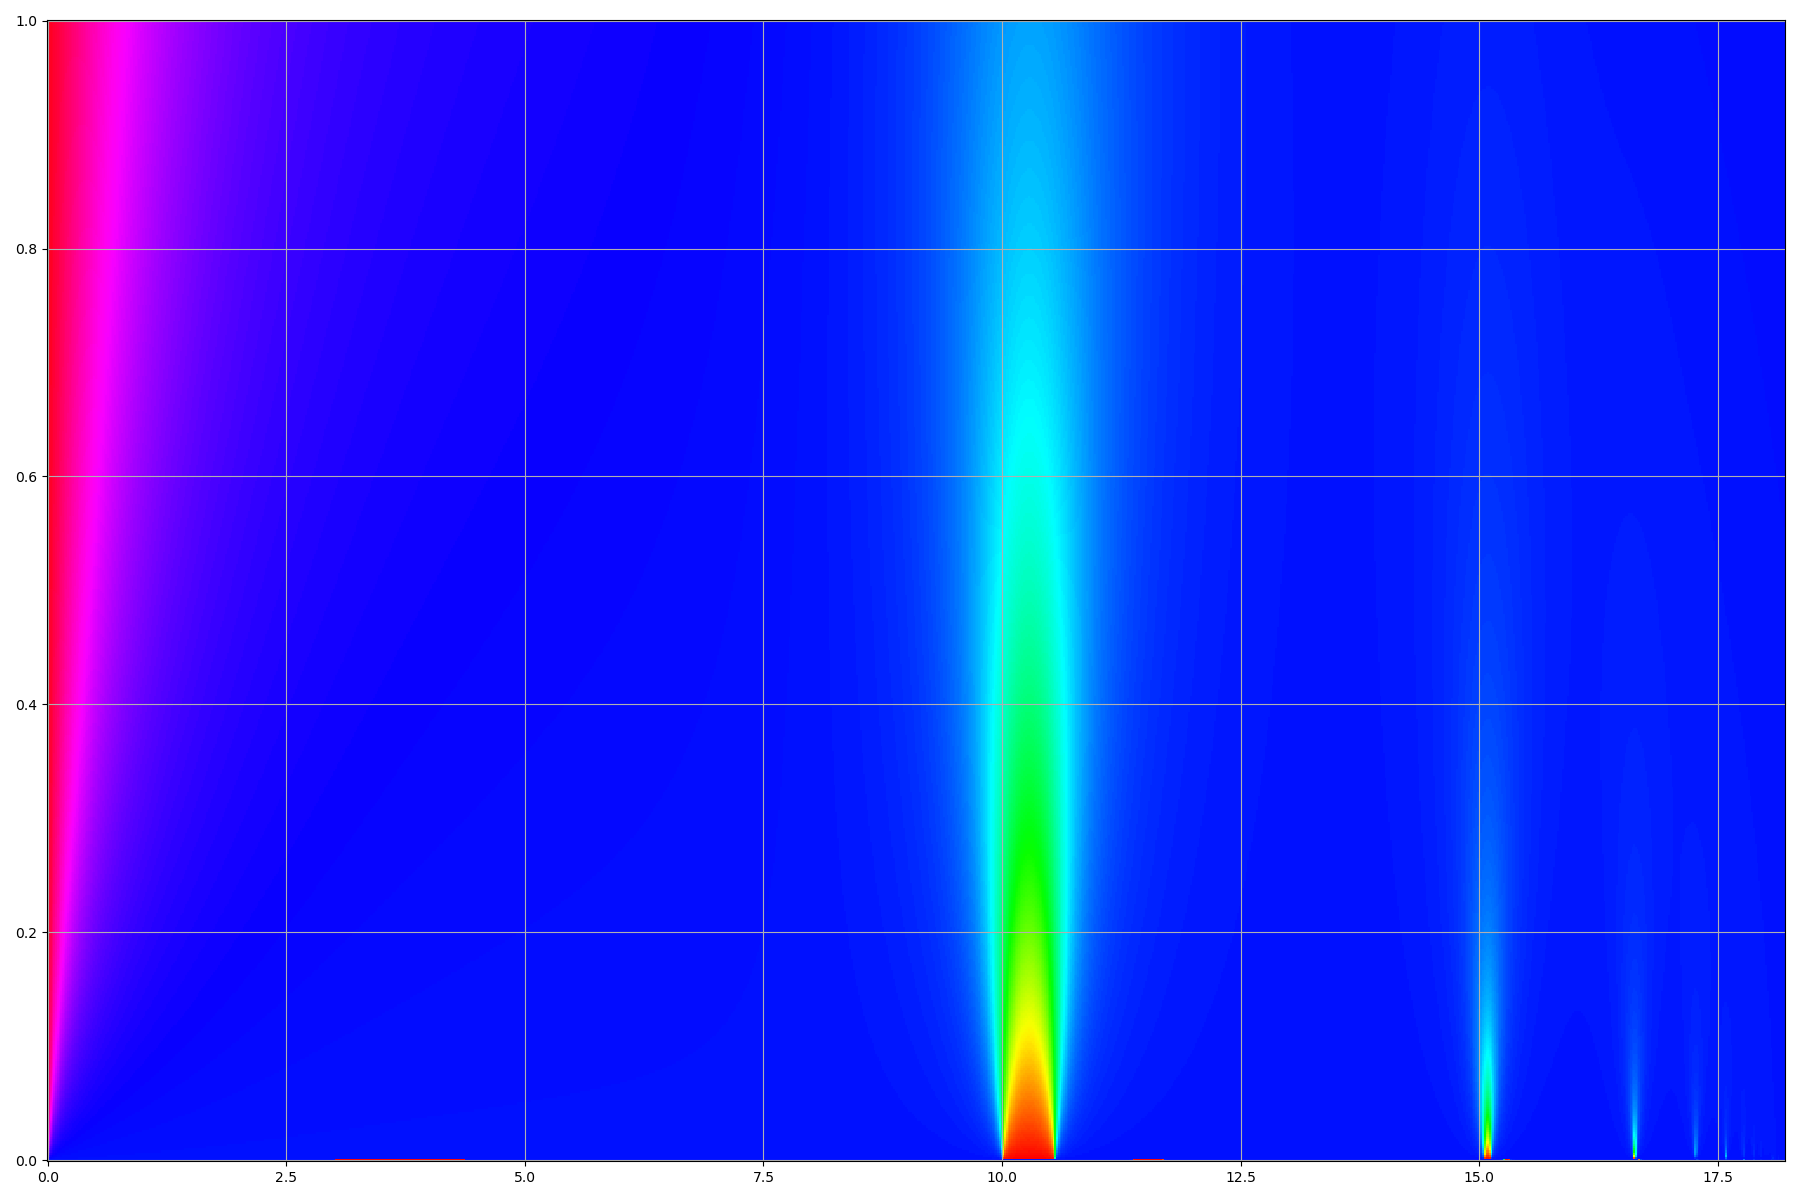

In [47]:
fig = plt.figure(figsize=(18,12))
plt.pcolor(re/2/np.pi,im/2/np.pi,np.angle(y_in),cmap="hsv")
plt.grid()
fig.tight_layout()
plt.show()

In [3]:
print(np.abs(np.sqrt(-1-0.1j)), np.angle(np.sqrt(-1-0.1j)))
print(np.abs(np.sqrt(-1+0.1j)), np.angle(np.sqrt(-1+0.1j)))

1.0024906793143213 -1.5209620005493156
1.0024906793143213 1.5209620005493156
